# 1. Models
In this notebook, we'll explore what is a model, how to create one and how to interpret data and predictions.
This part is important to understand before doing any Machine Learning as it it's the basics.

During this notebook we'll mostly talk about models regarding the library sklearn, which offers powerful models that can be used to predict all sorts of data.
In all notebooks regarding machine learning we're gonna use PyTorch, which is an alternative but more powerful approach of the problems we'll encounter, but it is more complex. Both ways are completely valid, but sklearn offers more traditional means that are simpler and still very powerful.

## 1.1 sklearn Basics

let's start by installing sklearn, numpy and matplotlib:

In [ ]:
%pip install scikit-learn numpy matplotlib

In [5]:
# Let's import sklearn, numpy and matplotlib.pyplot
import sklearn as sk
import numpy as np # Useful for operations
import matplotlib.pyplot as plt # Useful for plots

In sklearn, pytorch, tensorflow, numpy,... there's something called "shape" that is distribution of numbers in a set of data:

* If we have: [1, 2, 3]. We have 3 values: shape = (3)
* If we have: [[1], [2], [3]]. We have 3 dimensions with 1 value in each: shape = (3, 1)
* If we have: [[1, 2], [3, 4]]. This has 2 dimensions with two values inside of each: shape = (2, 2)
* A more complicated one: [ [[[2, 4], [3, 4]], [[4, 5], [5, 6]]] ]. We have 1 dimension, that inside has two dimensions with another two dimensions with two values.

**The first bracket doesn't count**

Obviously this can get complicated very quickly as we can get shapes like (100, 1, 300, 2). 
So we're only gonna use simpler shapes to avoid confusion.

### 1.1.1 Creating Dataset

Now, let's imagine we have some data that follows a straight line. (e.g X and Y have a positive correlation). Let's experiment our options when predicting Y values when we have X values.

In [41]:
start = -1000
stop = 1000
step = 0.1
X = np.arange(start=start, stop=stop, step=step) #List of X Values

# w is called weight or slope. Which is how much Y grows every step of X
w = 0.345
# b is the bias or independent value. It can be thought of as what value Y has when x is 0.
b = -0.934

# Creating values that follow the equation Y = w * x + b for all x
f = lambda x: w * x + b

Y = np.array([f(_x) for _x in X]) # create a new list where we apply the function to every x.

Let's see how the plot X-Y looks like

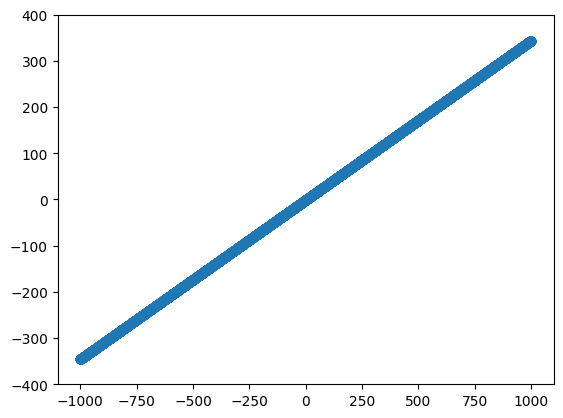

In [42]:
plt.scatter(X, Y)
plt.ylim((-400, 400))
plt.xlim((-1100, 1100))
plt.show()

As we can see, it's just a straight line with slope w and independent value b. Now, what if we removed part of the data? (e.g. all values above 500 are removed ) Could we predict what those values where in the begining?

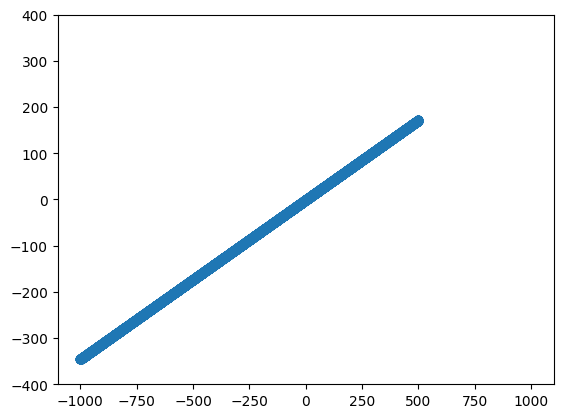

In [43]:
X_2 = X[:int((np.abs(stop-start)*0.75)/step)] # Here I am just dividing the list in 3/4 of the original
Y_2 = Y[:int(((np.abs(stop-start)*0.75)/step))]

plt.scatter(X_2, Y_2)
plt.ylim((-400, 400))
plt.xlim((-1100, 1100))
plt.show()

### 1.1.2 Creating the model

This is where a linear model could help, if we know some data, we can make predictions on new one based on the past.
To start, let's split our data into training and testing set. 

This is common practice in all ML/Predicting problems, as we can then evaluate how good our model using data the model hasn't seen before.

In [44]:
from sklearn.model_selection import train_test_split

X_2 = X_2.reshape((-1, 1)) # Here I am adding an extra dimension so that the dimension (-1 = keep as before, 1 = one dimension instead of 0)
Y_2 = Y_2.reshape((-1, 1)) # our model is expecting is met. It is important that we give it each X in its own array. 
#                            So X = [[1], [2], [3]] instead of X [1, 2, 3]. That's how the model expects data.
#                            the shape goes from (10000) to (10000, 1)

X_training, X_testing, y_training, y_testing = train_test_split(
    X_2, Y_2, test_size=0.4
)

Now it's time to choose our model. In our case, we have a problem that requires a linear regression. That is because our data clearly shows a linear behaviour (it follows a straight line).
Later we'll talk of what model works better for every case

In [45]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

### 1.1.3 Training the model

"Training" the model is the process of doing a linear regression or any other method to find an equation or system that fits our data the best.
In our case, we are applying a common linear regression, that you can checkout more at:

https://scikit-learn.org/stable/modules/linear_model.html#ordinary-least-squares

In [46]:
model.fit(X_training, y_training)

LinearRegression()

Now sklean has found a possible fit (there's a point of randomness, so if the data is not that linear every time you train the model you might have a slightly different set of weights). Let's see what values it has found as weight and bias.

In [51]:
model.coef_, model.intercept_

(array([[0.345]]), array([-0.934]))

Which are precisely the ones we chose at the beggining. So let's predict our missing values and see what we get

In [55]:
X_3 = X[int((np.abs(stop-start)*0.75)/step):]
Y_3 = model.predict(X_3.reshape(-1, 1))

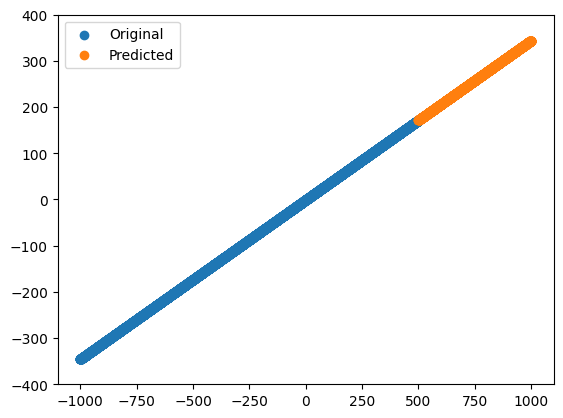

In [60]:
plt.scatter(X_2, Y_2)
plt.scatter(X_3, Y_3)
plt.ylim((-400, 400))
plt.xlim((-1100, 1100))
plt.legend(["Original", "Predicted"])
plt.show()

So as expected values match exactly with those we had before.

## 1.2 Models

Choosing a model is very important, and so below you can see a mind map with all decisions and models you'll need. Each model has it's own details and nuances, so I highly suggest checking its documentation at:

https://scikit-learn.org/stable/supervised_learning.html

You'll see they may talk about supervised and unsupervised learning. Supervised is when we give data labels. So if we are distinguishing between Pizzas and Fish, we are giving the model the option between the two. Unsupervised is when the model data in categories by itself, then we are the ones that assign the label if necessary, but the model doesn't know what is what, it chooses labels by itself.
You can see more details of supervised/unsupervised learning here:

https://cloud.google.com/discover/supervised-vs-unsupervised-learning

![Image](https://scikit-learn.org/stable/_static/ml_map.png)

## 1.3 Working with datasets

Working with large datasets can prove difficult or uncomfortable, for that purpose pandas, a python library for data manipulation was created.
It allows you to convert enormous datasets into an easy and compact "dataframe".

In [ ]:
# Installing pandas
%pip install pandas

In [4]:
import pandas as pd

# For example, we can import a csv file (It is like an excel sheet (you can export files as csv in excel))
data = pd.read_csv("./data/LCD_sample_csv.csv") # We import data from the csv and organize it into columns. Source of data: National Centers for Environmental Information (ncei.noaa.gov)

Useful Commands:

<Axes: ylabel='Frequency'>

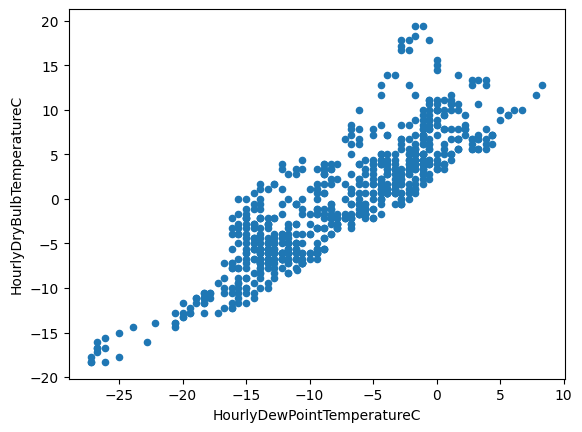

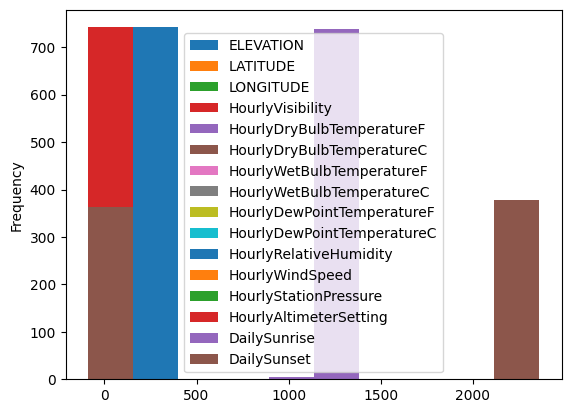

In [25]:
data.describe() # Gives basic information about the data
data.head() # first values of each column
data.tail() # last values of each column
data.drop_duplicates() # Returns new dataset with removed duplicates
data.sample(frac=0.5) # Returns random selection of the dataset
data.shape # Returns Shape of the dataset (As we said at the beggining, shape is how the data is structured)
data.dropna() # Removes any column with missing values
data.fillna(value=1) # Fills all missing values with a value
data.assign(HourlyAltimeterhPa = lambda df: df.HourlyAltimeterSetting * 33.86) # Creates a new column, which value can be a combination of other columns
data.plot.scatter(x="HourlyDewPointTemperatureC", y="HourlyDryBulbTemperatureC") # Creates a scatter plot between two columns
data.plot.hist() # Creates a histogram of either all data or a specific column

Extra functions can be checked out at : https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf